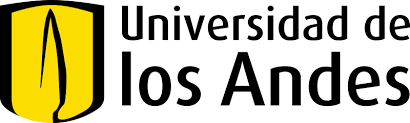

IIND-2104. Modelos Probabilisticos

<h1 style="color: #ADD8E6;">Complementaria 3
</h1>

<h3 style="color: #ADD8E6;">Ejemplo 1. Cadena de Markov de Tiempo Discreto 
</h3>

Retomando el problema de la complementaria 2 que considera la evolución del Índice de la Calidad del Aire (ICA) para el caso específico en que se considera únicamente los días laborables. La situación fue modelada con una CMTD con la variable de estado y espacio de estados que se muestra a continuación. 

$$
I_n = \text{Nivel del ICA en el n-ésimo día}
$$

$$
S_I = \{1, 2, 3, 4, 5\}
$$


Las probabilidades de transición en un paso entre estados de esta CMTD son las siguientes:

$$
P_{i \rightarrow j} = \begin{cases}
0.5 & \text{si } j = i + 1, i < 5 \\
0.3 & \text{si } j = i, 1 < i < 5 \\
0.2 & \text{si } j = i - 1, i > 1 \\
0.5 & \text{si } j = i = 1 \\
0.8 & \text{si } j = i = 5 \\
0 & \text{dlc}
\end{cases}
$$


Ahora, se implementarán en Python estos componentes del modelo. Los detalles de la implementación ya fueron explicados en la complementaria 2.

In [1]:
import numpy as np

filas = 5
columnas = 5

# Crear una matriz de ceros de 5x5
matriz = np.zeros((filas, columnas), dtype = float)

# Llenar la matriz con valores
for i in range(filas):
    for j in range(columnas):
        if j == i + 1 and i < filas - 1:
            matriz[i, j] = 0.5
        elif j == i and i > 0 and i < filas - 1:
            matriz[i, j] = 0.3
        elif j == i - 1 and i > 0:
            matriz[i, j] = 0.2
        elif i == j == 0:
            matriz[i, j] = 0.5
        elif i == j == filas - 1:
            matriz[i, j] = 0.8

print(matriz)

[[0.5 0.5 0.  0.  0. ]
 [0.2 0.3 0.5 0.  0. ]
 [0.  0.2 0.3 0.5 0. ]
 [0.  0.  0.2 0.3 0.5]
 [0.  0.  0.  0.2 0.8]]


Para crear la cadena de markov utilizaremos la libreria jmarkov, en este caso solo utilizaremos la instancia `dtmc` ya que estamos creando una cadena de markov de tiempo **discreto**.

In [2]:
from jmarkov.dtmc import dtmc

Finalmente, utilizaremos la funcion `dtmc` que tiene como parametro la `matriz` que creamos anteriormente.

In [3]:
P = dtmc(matriz)

<h3 style="color: #ADD8E6;">Problema 1. Literal b.
</h3>

En este caso se pide calcular la probabilidad de que en el día viernes el proceso estocástico esté en cualquiera de los estados que determinan el cierre de los colegios (o sea los estados 4 y 5), dado que hoy (lunes) está en el nivel 2.

$$
\alpha \cdot P^4, 
$$
$$
\alpha = \{0, 1, 0, 0, 0\}
$$

Para calcular la distribución de probabilidad mencionada en Python se utilizara el método `transient_probabilities` de la libreria `jmarkov` que recibe como parametro el vector inicial `alpha` y la cantidad de pasos necesarios `n`

In [4]:
prob_viernes = P.transient_probabilities(n = 4, alpha = np.array([0, 1, 0, 0, 0]))

Para encontrar la probabilidad que se busca se suman los dos últimos componentes del vector `prob_viernes`, que corresponden a las probabilidades de que el proceso estocástico esté en el estado 4 o 5 después de 4 pasos (días) de evolución. 

In [5]:
prob_cierre = prob_viernes[3] + prob_viernes[4]

print(f' La probabilidad de que el Viernes los colegios suspendan la actividad academica debido a la mala calidad del aire es: {prob_cierre}')

 La probabilidad de que el Viernes los colegios suspendan la actividad academica debido a la mala calidad del aire es: 0.4475


<h3 style="color: #ADD8E6;">Problema 1. Literal c.
</h3>

El literal c pide proporcionar una expresión para el gasto promedio total en que incurrirá el distrito hasta el viernes teniendo en cuenta que  el distrito incurre en un gasto de 120 millones de COP por día cuando el ICA alcanza el nivel "Muy dañina para la salud". Hoy es lunes, y el ICA está en nivel "Moderada".  



Nuevamente, en este es caso posible resolver la pregunta usando análisis transitorio del modelo. Es necesario calcular primero los vectores de distribución de probabilidad de estado, para cada día, dado que el día lunes el ICA se encuentra en el nivel 2.

In [6]:
alpha = np.array([0, 1, 0, 0, 0])

probs_martes = P.transient_probabilities(n = 1, alpha = alpha)

probs_miercoles = P.transient_probabilities(n = 2, alpha = alpha)

probs_jueves = P.transient_probabilities(n = 3, alpha = alpha)

probs_viernes = P.transient_probabilities(n = 4, alpha = alpha)

A continuacion se calcula el gasto esperado para cada día, multiplicando el valor del gasto diario por el quinto componente de cada uno de los vectores de probabilidad previamente calculados.

In [7]:
gasto_diario = 120

gasto_martes = gasto_diario * probs_martes[4]
gasto_miercoles = gasto_diario * probs_miercoles[4]
gasto_jueves = gasto_diario * probs_jueves[4]
gasto_viernes = gasto_diario * probs_viernes[4]

El gasto promedio total está dado por la suma de los costos de cada día.

In [8]:
gasto_total = gasto_martes + gasto_miercoles + gasto_jueves + gasto_viernes
gasto_total

40.5

<h3 style="color: #ADD8E6;">Ejemplo 2. Cadena de Markov de Tiempo Continuo 
</h3>

Ahora, se resolverá el problema 2 que se encuentra en el archivo “Complementaria 3 (Q).pdf”. Sea $ \{X(t), t > 0\} $ el número de bicicletas alquiladas en el tiempo $ t $, y sea $S_x = \{0, 1, 2, ..., 15\}$. Como es una cadena de Markov en tiempo continuo (CMTC), se debe definir la matriz **Q**. Las tasas de transición entre estados de esta cadena son las siguientes:

$$
Q_{i \rightarrow j} = \begin{cases}
5 & \text{si } j = i + 1, i < 15 \\
9 \cdot i & \text{si } j = i - 1, i > 0 \\
0 & \text{d.l.c}
\end{cases}
$$

Ahora, se crea la matriz de tasas de transición, que la llamaremos `matriz2`:

In [9]:
from jmarkov.ctmc import ctmc

filas = 15
columnas = 15

# Crear una matriz de ceros de 15x15
matriz2 = np.zeros((filas, columnas), dtype = float)

# Se llena la matriz con las respectivas tasas.
for i in range(filas):
    for j in range(columnas):
        if j == i + 1 and i < 15:
            matriz2[i, j] = 5
        elif j == i - 1 and i > 0:
            matriz2[i, j] = 9 * i

# Se llena la diagonal con la suma negativa de las filas de la matriz.

for i in range(15):
    # Diagonal.
    matriz2[i,i] = -np.sum(matriz2[i, :])

Q = ctmc(matriz2)


Para hacer estudios de análisis transitorio en CMTC, se debe calcular el vector de probabilidades $ \pi(t) $. Para esto, se utiliza el exponencial de la matriz $ Qt $. Recuerde que:

$$
\pi(t) = \pi(0)e^{Q \cdot t}
$$


donde $ \pi(0)$ es el vector de estado inicial de probabilidades y $ t $ es el instante de tiempo al cual se desea calcular la distribución de probabilidad.

<h3 style="color: #ADD8E6;">Problema 2. Literal b.
</h3>

El literal b dice: Según la Secretaría de Salud, los estudiantes no deben asistir al colegio si el ICA supera el nivel Dañina/Grupos Sensibles. Hoy es lunes y el ICA está en nivel Moderada. ¿Cuál es la probabilidad de que el viernes se suspenda la actividad académica debido a mala calidad del aire?

Para solucionar este problema, se debe empezar calculando las probabilidades de tener alquiladas un determinado número de bicicletas el próximo lunes a las 12:00 pm, dado que hoy (jueves) a las 12:00 pm, 10 bicicletas están alquiladas.

A continuación se crea el vector de estado inicial de probabilidades, que tendrá por nombre `alpha2`:

In [10]:
# Crear un array con 16 elementos, todos con valor de 0.
alpha2 = np.zeros(15) 

#Asignar un 1 en la posición 11 (indice 10). Ya que corresponde a las 10 bicicletas prestadas en el momento t.
alpha2[10] = 1
alpha2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Con esto, es posible calcular el vector de probabilidades del próximo lunes a las 12:00 pm. Se sabe que en este caso el valor de t, es igual a 96 y está expresado en horas. Para calcular la distribución de probabilidad se utilizara la funcion `transient_probabilities` de la libreria `jmarkov` que recibe como parametro el vector inicial `alpha` y la cantidad de horas necesarios `t = 96`

In [11]:
probs = Q.transient_probabilities(t = 96, alpha = alpha2)

Como la variable de estado está expresada en términos del número de bicicletas alquiladas, si a 15 se le resta este número, entonces se obtendrá el número de bicicletas que están **disponibles** en el local. Esto es lo que se tiene en cuenta a continuación, para encontrar el valor esperado de bicicletas a las que se les realizará limpieza y mantenimiento.

In [12]:
num_bicis = 15 - np.arange(len(probs))
resultado = np.sum(probs * num_bicis)
print(f'El numero promedio de bicicletas a las que se les realizara limpieza y mantenimiento el lunes es: {round(resultado,3)}')

El numero promedio de bicicletas a las que se les realizara limpieza y mantenimiento el lunes es: 14.444


<h3 style="color: #ADD8E6;">Comandos Utiles
</h3>

A continuación se presentan algunos comandos que pueden ser de utilidad al momento de estudiar Cadenas de Markov de Tiempo Continuo o Cadenas de Markov de Tiempo Discreto:

| Comando | Operacion |
|:---:|:---:|
| `is_ergodic` | Retorna verdadero si la cadena es ergodica, falso en caso contrario.|
| `is_irreducible` | Retorna verdadero si la cadena es irreducible, falso en caso contrario. |
| `first_passage_time` | Calcula el tiempo promedio de primera llegada a un estado objetivo desde un estado inicial. |
| `occupation_time` |  Calcula el tiempo promedio que la cadena permanecerá en cada estado, considerando todos los estados iniciales posibles. |
| `period` | Retorna el periodo de la cadena. |
| `steady_state` | Calcula la distribución estacionaria de la cadena de Markov. |
| `transient_probabilities` | Calcula la distribución transitoria en el instante n o t, dado el estado inicial alpha |
| `n_states` | Retorno el numero de estados de la cadena. |
